<img src="img/saclay_center.png" width="800" height="600">

<center> <font color="blue"><h2>  Datacamp Challenge : Prediction of daily transport validation in Paris public underground transports </h2> </center>

<center> <h4> Authors :Dina ABED , Siwar ABBES , Gwendal HENGOAT , Jules ZACCARDI , Mohamed Skander HELLAL , Philippe DE SAINT CHAMAS</h4> </center>

<img src="img/sncf.jpg" width="600" height="600">

### Table of contents
1. [Business Case](#Businesscase)
2. [Libraries to install](#Libraries)
3. [Data for the challenge](#Data)
4. [Exploratory Data analysis](#Data-exploration)
5. [Prediction](#Prediction)
6. [Evaluation](#Evaluation)
7. [Local testing](#Local-testing)

<a id='Businesscase'></a>
## 1. Business Case

### 1.1.Introduction

### 1.2.Business problem

### 1.3.Challenge aim

### 1.4.Business Metric

For this challenge we shall use the Log-Cosh Loss.
It is defined as follows:
$$ L(y,y^p) = \sum_{i = 1}^n log(cosh(y_i^p-y_i)). $$
It is close to $x^2/2$ for small values and $|x|-log(2)$ for large values. It works like the mean squared error but is robust to outlayers with larges values. It has the advantage on the Huber loss that it is twice derivable which can be useful for some regression methods. 

<a id='Libraries'></a>
## 2.Libraries to install

This starting kit requires the following libraries:

* `numpy`
* `pandas`
* `seaborn`
* `scikit-learn`
* `matplolib`
* `folium`
* `calendar`
* `datetime`
* `IPythhon`

We recommand you to install these libraries using `conda` (using the [`Anaconda`](https://www.anaconda.com/distribution/) distribution).

For this challenge, `ramp-workflow` is also needed. This can be installed from the master branch on GitHub:

      python -m pip install https://api.github.com/repos/paris-saclay-cds/ramp-workflow/zipball/master

<a id='Data'></a>
## 3 . Data for the challenge

un descriptif du data que nous allons utiliser

### Import Labraries

In [1]:
import sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import folium
import pandas as pd
import calendar

from datetime import timedelta, date
from IPython.display import display
from folium import Popup

%matplotlib inline
sns.set_style('ticks')
sns.set(rc={'figure.figsize':(13.7,9.27)})
warnings.filterwarnings('ignore')

### Loading the Data

In [2]:
# Load train data
#X_train , y_train = get_train_data() (A faire quand problem.py sere prêt)
#X_train.shape , y_train.shape
X_train = pd.read_csv('data_challenge.csv') 

In [3]:
#X_train.head() (A faire quand problem.py sere prêt)
# Provisoirement avec toute la data:
X_train.head()

,JOUR,LIBELLE_ARRET,NB_VALD,lon,lat,res_com,mode_,principal,nb_rer,nb_metro,...,Nbre plateformes,duree,type_inc,num_inc,est_greve,Jour de la semaine,Horaire en jour normal,Horaire en jour férié,est_jour_ferie,type_jour
0,2015-01-01,ABBESSES,750,48.884505,2.338365,M12,Metro,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,0.0,Thursday,NaN,NaN,1,Jour de l'an
1,2015-01-01,ABLON,118,NaN,NaN,RER C,RER,0.0,NaN,NaN,...,1.0,NaN,NaN,NaN,0.0,Thursday,NaN,NaN,1,Jour de l'an
2,2015-01-01,ACHERES-GRAND-CORMIER,18,48.955388,2.092457,RER A,RER,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,0.0,Thursday,NaN,NaN,1,Jour de l'an
3,2015-01-01,ACHERES-VILLE,482,48.970248,2.077672,LIGNE L / RER A,Train / RER,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,0.0,Thursday,NaN,NaN,1,Jour de l'an
4,2015-01-01,AEROPORT CHARLES DE GAULLE 1,1257,49.010400,2.561357,RER B / CDGVAL,RER / Navette,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,0.0,Thursday,NaN,NaN,1,Jour de l'an


The data is composed of x features and y observations.Each observation corresponds to + explication des features ....

In [4]:
# X_train.describe()
X_train.describe()

,NB_VALD,lon,lat,principal,nb_rer,nb_metro,Nbre plateformes,num_inc,est_greve,est_jour_ferie
count,1.047319e+06,559590.000000,559590.000000,1.015031e+06,523080.000000,523080.000000,266542.0,130673.000000,1.047319e+06,1.047319e+06
mean,6.342510e+03,48.859174,2.343714,1.007812e-01,0.236484,1.024870,1.0,7.186993,1.986959e-01,3.054466e-02
std,1.103470e+04,0.048950,0.094432,3.010389e-01,0.432623,0.808764,0.0,19.867400,3.990188e-01,1.720805e-01
min,5.000000e+00,48.695061,2.012258,0.000000e+00,0.000000,0.000000,1.0,1.000000,0.000000e+00,0.000000e+00
25%,6.410000e+02,48.839597,2.300818,0.000000e+00,0.000000,1.000000,1.0,1.000000,0.000000e+00,0.000000e+00
50%,3.461000e+03,48.860240,2.344580,0.000000e+00,0.000000,1.000000,1.0,2.000000,0.000000e+00,0.000000e+00
75%,8.270000e+03,48.881299,2.386277,0.000000e+00,0.000000,1.000000,1.0,5.000000,0.000000e+00,0.000000e+00
max,2.190510e+05,49.049765,2.773608,1.000000e+00,2.000000,5.000000,1.0,356.000000,1.000000e+00,1.000000e+00


In [5]:
X_train.isna().sum() / X_train.shape[0]

JOUR                      0.000000
LIBELLE_ARRET             0.000000
NB_VALD                   0.000000
lon                       0.465693
lat                       0.465693
res_com                   0.030829
mode_                     0.030829
principal                 0.030829
nb_rer                    0.500553
nb_metro                  0.500553
Segment DRG               0.746716
Nbre plateformes          0.745501
duree                     0.875231
type_inc                  0.875231
num_inc                   0.875231
est_greve                 0.000000
Jour de la semaine        0.000000
Horaire en jour normal    0.974832
Horaire en jour férié     0.976707
est_jour_ferie            0.000000
type_jour                 0.000000
dtype: float64

In [6]:
X_train.nunique()

JOUR                       1458
LIBELLE_ARRET               735
NB_VALD                   44127
lon                         385
lat                         385
res_com                     140
mode_                        15
principal                     2
nb_rer                        3
nb_metro                      6
Segment DRG                   3
Nbre plateformes              1
duree                       591
type_inc                     11
num_inc                     122
est_greve                     2
Jour de la semaine            7
Horaire en jour normal       27
Horaire en jour férié        14
est_jour_ferie                2
type_jour                    13
dtype: int64

In [7]:
X_train.dtypes

JOUR                       object
LIBELLE_ARRET              object
NB_VALD                     int64
lon                       float64
lat                       float64
res_com                    object
mode_                      object
principal                 float64
nb_rer                    float64
nb_metro                  float64
Segment DRG                object
Nbre plateformes          float64
duree                      object
type_inc                   object
num_inc                   float64
est_greve                 float64
Jour de la semaine         object
Horaire en jour normal     object
Horaire en jour férié      object
est_jour_ferie              int64
type_jour                  object
dtype: object

<a id='Data-exploration'></a>
##  4 . Exploratory Data analysis

### 4.1.Day_Off

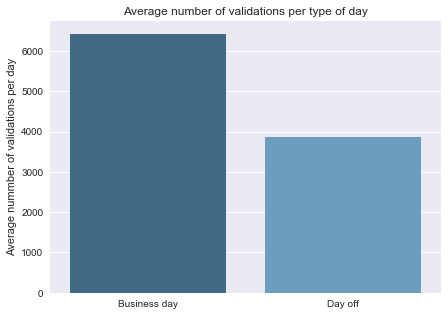

In [8]:
data_train_jour_ferie = X_train.groupby('est_jour_ferie').agg({'NB_VALD':'mean'})
plt.figure(figsize=(7,5))
index = np.arange(data_train_jour_ferie.shape[0])
ax = sns.barplot(x=index, y=data_train_jour_ferie['NB_VALD'], data=data_train_jour_ferie, palette="Blues_d")
ax = ax.set_xticklabels(["Business day","Day off"])
plt.ylabel('Average nummber of validations per day')
plt.title('Average number of validations per type of day')
plt.show()

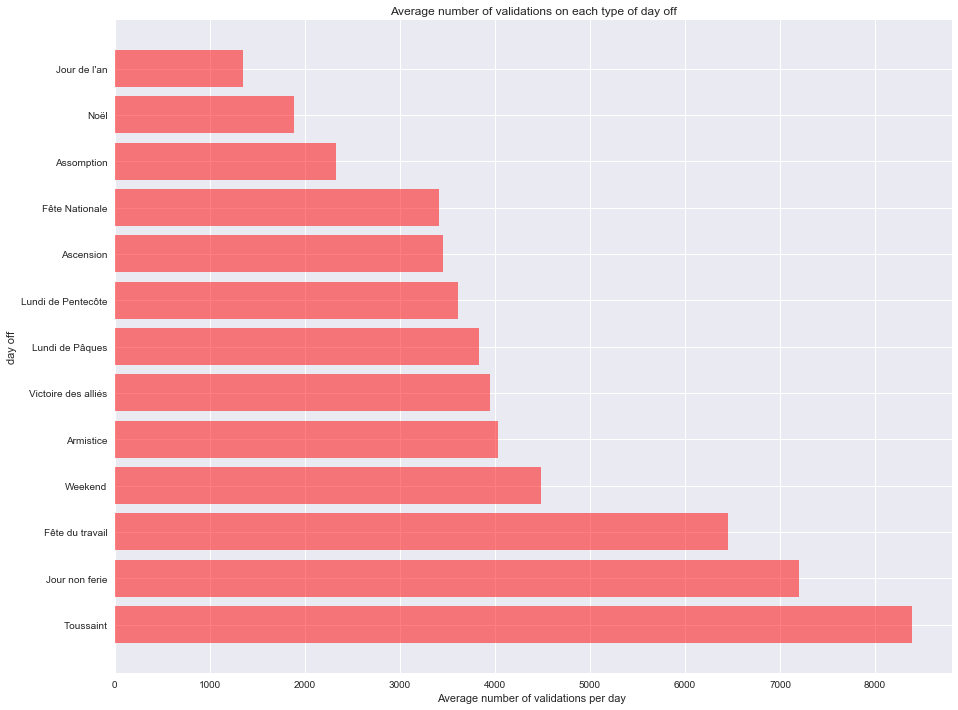

In [9]:
data_train_type_jour = X_train.groupby('type_jour').agg({'NB_VALD':'mean'})
data_train_type_jour = data_train_type_jour.sort_values(by='NB_VALD', ascending=False)

plt.figure(figsize=(15,12))
index = np.arange(data_train_type_jour.shape[0])
plt.barh(index, data_train_type_jour['NB_VALD'], alpha=0.5, color='r')
plt.yticks(range(data_train_type_jour.shape[0]), data_train_type_jour.index)
plt.ylabel('day off')
plt.xlabel('Average number of validations per day ')
plt.title('Average number of validations on each type of day off')
plt.show()

### 4.2. Number of validations per month

In [10]:
# Feature Engineering : Month
X_train['JOUR'] = pd.to_datetime(X_train['JOUR'])
X_train['mois'] = X_train['JOUR'].apply( lambda val: val.month)
X_train.head()

,JOUR,LIBELLE_ARRET,NB_VALD,lon,lat,res_com,mode_,principal,nb_rer,nb_metro,...,duree,type_inc,num_inc,est_greve,Jour de la semaine,Horaire en jour normal,Horaire en jour férié,est_jour_ferie,type_jour,mois
0,2015-01-01,ABBESSES,750,48.884505,2.338365,M12,Metro,0.0,0.0,1.0,...,NaN,NaN,NaN,0.0,Thursday,NaN,NaN,1,Jour de l'an,1
1,2015-01-01,ABLON,118,NaN,NaN,RER C,RER,0.0,NaN,NaN,...,NaN,NaN,NaN,0.0,Thursday,NaN,NaN,1,Jour de l'an,1
2,2015-01-01,ACHERES-GRAND-CORMIER,18,48.955388,2.092457,RER A,RER,0.0,1.0,0.0,...,NaN,NaN,NaN,0.0,Thursday,NaN,NaN,1,Jour de l'an,1
3,2015-01-01,ACHERES-VILLE,482,48.970248,2.077672,LIGNE L / RER A,Train / RER,0.0,1.0,0.0,...,NaN,NaN,NaN,0.0,Thursday,NaN,NaN,1,Jour de l'an,1
4,2015-01-01,AEROPORT CHARLES DE GAULLE 1,1257,49.010400,2.561357,RER B / CDGVAL,RER / Navette,0.0,1.0,0.0,...,NaN,NaN,NaN,0.0,Thursday,NaN,NaN,1,Jour de l'an,1


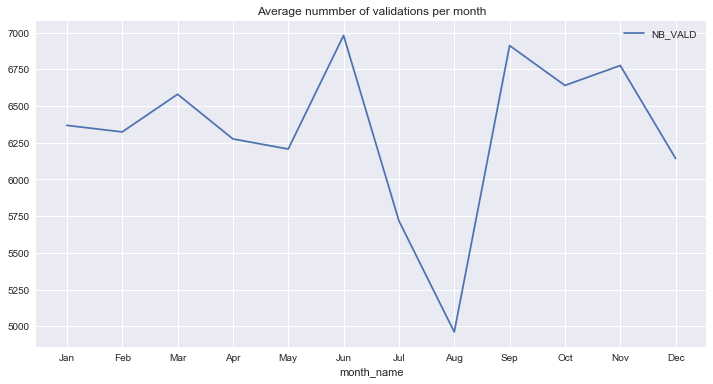

In [11]:
data_vis = X_train.copy()
data_vis['month_name'] = X_train['JOUR'].apply( lambda val: val.month)
data_vis = data_vis.groupby('month_name').agg({'NB_VALD': 'mean'}).plot(figsize=(12,6))
ticks = list(range(1, 13, 1)) # points on the x axis where labels appear
labels = 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
plt.xticks(ticks,labels)
plt.title('Average nummber of validations per month');

### 4.3. Number of validations per week_day

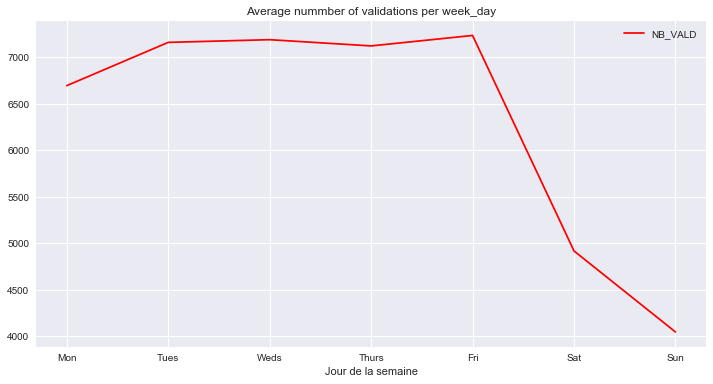

In [12]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
X_train.groupby('Jour de la semaine').agg({'NB_VALD': 'mean'}).reindex(days).plot(figsize=(12,6), color='red')
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks,labels)
plt.title('Average nummber of validations per week_day');

### 4.4 .Heatmap : Number of validations per station

In [13]:
data_map = X_train.groupby('LIBELLE_ARRET').agg({'NB_VALD': 'sum','lon':'mean','lat':'mean'})
data_map['nb_valid_per_month'] = (data_map['NB_VALD'] / 30).astype(int)
data_map = data_map[pd.notnull(data_map['lon'])]
data_map.reset_index(level=0, inplace=True)
data_map.head()

,LIBELLE_ARRET,NB_VALD,lon,lat,nb_valid_per_month
0,ABBESSES,4432015,48.884505,2.338365,147733
1,ACHERES-GRAND-CORMIER,67257,48.955388,2.092457,2241
2,ACHERES-VILLE,4999559,48.970248,2.077672,166651
3,AEROPORT CHARLES DE GAULLE 1,6359722,49.010400,2.561357,211990
4,AEROPORT CHARLES DE GAULLE 2-TGV,6776319,49.004199,2.570946,225877


In [14]:
LDN_COORDINATES = (48.8534, 2.3488)
myMap = folium.Map(location=LDN_COORDINATES, zoom_start=11)
for i in range(0,len(data_map)):
    folium.Circle(
      location=[data_map.iloc[i]['lon'], data_map.iloc[i]['lat']],
      popup= Popup('<h3>'+ str(data_map.iloc[i]['LIBELLE_ARRET']).upper() + '</h3>' + '<br>'
                 '<b> Mean_Nb_valid_per_Month: </b>' + str(data_map.iloc[i]['nb_valid_per_month']) + '<br>'
                      
                ),
      radius=data_map.iloc[i]['nb_valid_per_month'].astype(float)/5000 ,
      color='crimson',
      fill=True,
      fill_color='crimson',
        

   ).add_to(myMap)
 
display(myMap)
myMap.save(outfile= "Map.html")

We can observe on the map that our data cover Paris and many other close cities. We remark that the number of validation is higher in center of Paris and in the station "La Défense-Grande Arche". 
As we can see below, if we click at a station, we can observe the average number of validation per month corresponding to this station.

[![map.png](https://i.postimg.cc/1Xq1th2N/map.png)](https://postimg.cc/5QbR7Gxx)

#### Top 5 stations with higher number of validations per month

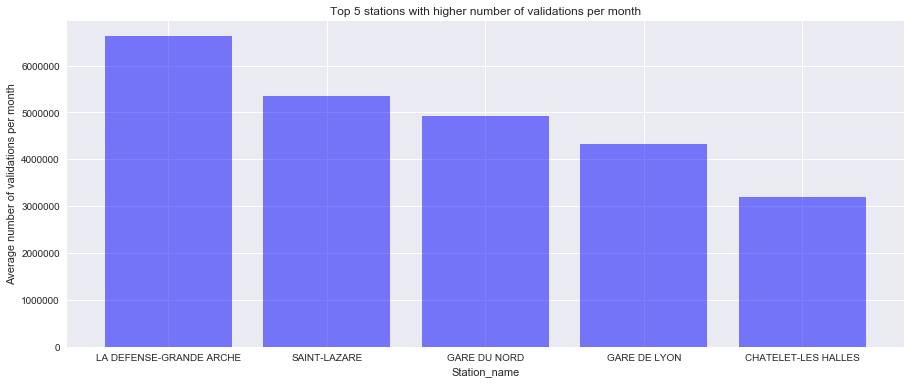

In [15]:
data_map = data_map.sort_values(by='nb_valid_per_month', ascending=False)[:5]

plt.figure(figsize=(15,6))
y_pos = np.arange(data_map.shape[0])
rects = plt.bar(y_pos, data_map['nb_valid_per_month'], align='center', alpha=0.5, color='b')
plt.xticks(y_pos, data_map['LIBELLE_ARRET'])
plt.ylabel('Average number of validations per month')
plt.xlabel('Station_name')
plt.title('Top 5 stations with higher number of validations per month')
plt.show()

### 4.5.  Validation and Stations characteristics

#### 4.5.1 . Validation average with RER number per station 

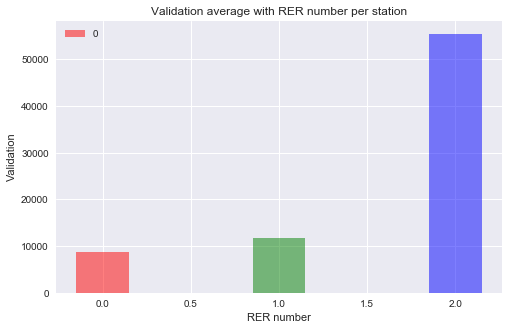

In [19]:
data_gare_vld = X_train[['NB_VALD','principal','nb_rer','nb_metro','Nbre plateformes']]

data_nb_rer = data_gare_vld.groupby('nb_rer').agg({'NB_VALD':'mean'}).reset_index()
plt.figure(figsize=(8,5))
plt.subplots_adjust(hspace=2)
index = np.arange(data_nb_rer.shape[0]).tolist()
plt.bar(index, data_nb_rer['NB_VALD'], width=0.3,alpha=0.5,color = ['r','g','b'])

plt.ylabel('Validation')
plt.xlabel('RER number')
plt.title('Validation average with RER number per station')
plt.legend(index,loc = 2)
plt.show()

#### 4.5.2.  Validation average with Metro number per station 

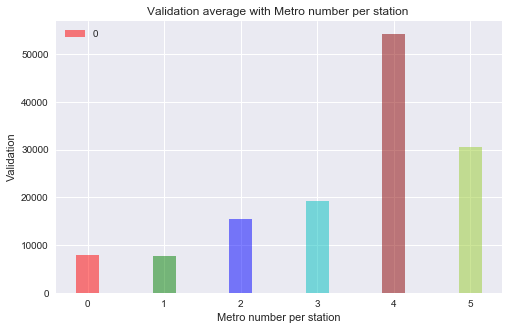

In [20]:
data_nb_metro = data_gare_vld.groupby('nb_metro').agg({'NB_VALD':'mean'})
plt.figure(figsize=(8,5))
index = np.arange(data_nb_metro.shape[0])
plt.bar(index, data_nb_metro['NB_VALD'], width=0.3,alpha=0.5, color= ['r','g','b','c','darkred','yellowgreen'])

plt.ylabel('Validation')
plt.xlabel('Metro number per station')
plt.title('Validation average with Metro number per station ')
plt.legend(index,loc = 2)
plt.show()

#### 4.5.3 . Validation average with station type

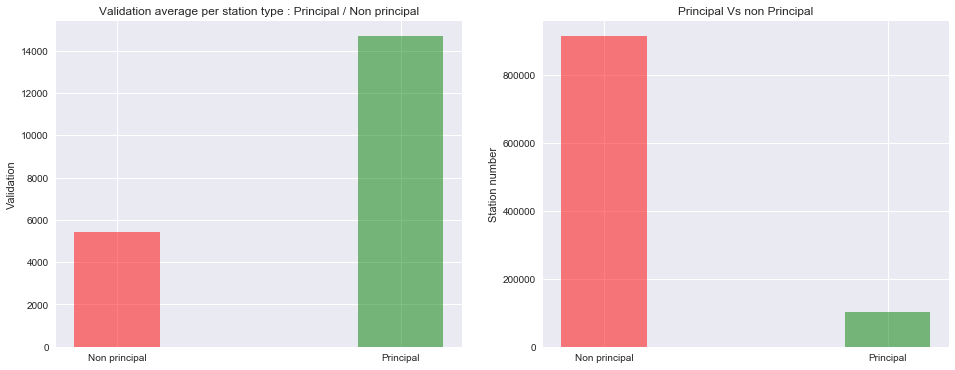

In [21]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
data_principal = data_gare_vld.groupby('principal').agg({'NB_VALD':'mean'})
index = np.arange(data_principal.shape[0])
plt.bar(index, data_principal['NB_VALD'], width=0.3,alpha=0.5, color= ['r','g'])
plt.xticks([1,0],('Principal','Non principal'))
plt.ylabel('Validation')
plt.title('Validation average per station type : Principal / Non principal')

plt.subplot(1,2,2)
data_nbr_principal = data_gare_vld.groupby('principal')['principal'].count()
index = np.arange(data_nbr_principal.shape[0])
plt.bar(index, data_nbr_principal.values, width=0.3,alpha=0.5, color= ['r','g'])
plt.xticks([1,0],('Principal','Non principal'))
plt.ylabel('Station number')
plt.title('Principal Vs non Principal')
plt.show()

<a id='Prediction'></a>
## 5. Prediction

### 5.1.Feature Extractor

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline


class FeatureExtractor(object):
    def __init__(self):
        pass

    def fit(self, X_df, y_array):
        return(self)

    def transform(self, X_df):
        return self.preprocessor.transform(X_df)

### 5.2.Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator


class Regressor(BaseEstimator):
    def __init__(self):
        self.reg = RandomForestRegressor(n_estimators=5)

    def fit(self, X, y):
        self.reg.fit(X, y)

    def predict(self, X):
        return self.reg.predict(X)

<a id='Evaluation'></a>
## 6. Evaluation

<a id='Local-testing'></a>
## 7. Local Testing